In [216]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 4: Binary Classification

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [246]:
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


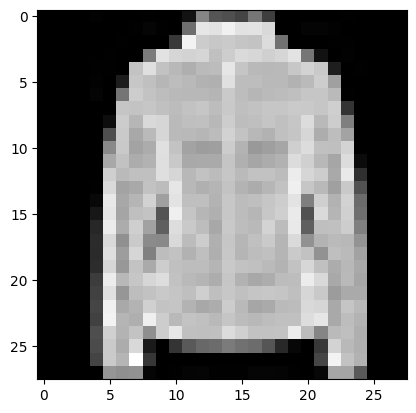

label is Shirt


In [247]:
# PART (a): 
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

Text(0, 0.5, 'Percentage of Misclassified Points')

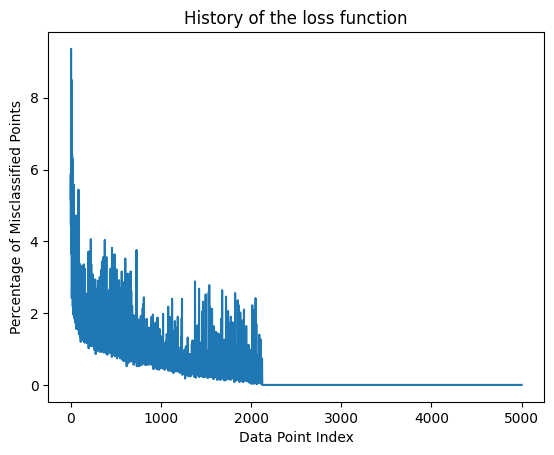

In [77]:
# PART (b),(c): 
# Implement the perceptron Algorithm and compute the number of mis-classified point
N = X_train.shape[0] # Number of data point train
N_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features
loss_hist_hor_axis = np.arange(0, N)
loss_hist = []
W = np.zeros((d+1,1))
X_train_h = np.hstack((np.ones((N,1)), X_train))
X_test_h = np.hstack((np.ones((N_test,1)), X_test))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test accuracy in the same plot
# for m range from 1 to N
# ================================================================ #
for m in range(N):
    for index in range(N):
        x = X_train_h[index]
        y = y_train[index]
        a = W.T @ x
        if (a * y) <= 0:
            W = W + (y*x).reshape(W.shape)

    numMissClassified = 0
    for i in range(N):
        if np.sign(W.T @ X_train_h[i]) != y_train[i]:
            numMissClassified += 1
    loss_hist.append((numMissClassified / (len(y_train))) * 100)

plt.plot(loss_hist_hor_axis, loss_hist)
plt.title("History of the loss function")
plt.xlabel("Data Point Index")
plt.ylabel("Percentage of Misclassified Points")
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

In [219]:
# part b continued and part c
print("Final value of loss function: ", loss_hist[len(loss_hist) - 1])
print("Squared l2 norm value of the weight: ", np.linalg.norm(W, ord = 2) ** 2)

testNumMisclassified = 0
for testI in range(N_test):
        if np.sign(W.T @ X_test_h[testI]) != y_test[testI]:
                testNumMisclassified += 1

percentageMisclassified = (testNumMisclassified / len(y_test)) * 100
print("Percentage of misclassified points in test data: ", percentageMisclassified)

Final value of loss function:  [0.30212535]
Squared l2 norm value of the weight:  659979038983.0001
Percentage of misclassified points in test data:  9.0


## Train Logistic Regression
In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent.

In [220]:
from codes.Logistic import Logistic

In [228]:
## PART (f): 
X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= [0.69314718]
188442.90860326999


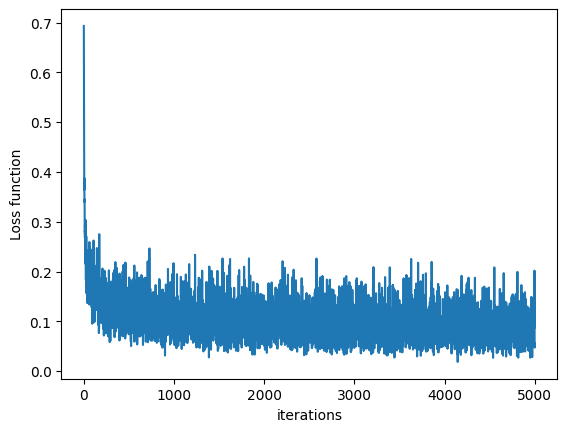

Weight squared norm 0.00028498989272882655
Final loss [0.05650995]


In [229]:
## PART (g):
## Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=100, num_iters=5000)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/LR_loss_hist.pdf')
print('Weight squared norm',np.linalg.norm(w,ord=2)**2)
print('Final loss',loss_history[-1])

In [230]:
# PART (h)
# Complete predict function in Logisitc.py file and compute the percentage of mis-classified points
y_pred = logistic.predict(X_test)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err,'%')

4.8 %


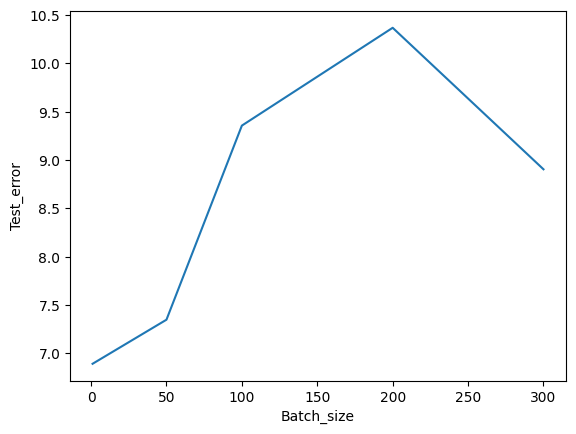

In [231]:
## PART (i): 
Batch = [1, 50, 100, 200, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size. Avergae the test error over 10 times
# ================================================================ #
for index in range(len(Batch)):
    b = Batch[index]
    avg_test_err = 0
    numTrainings = 50
    for i in range(numTrainings): # train each model 50 times
        logistic = Logistic(d=d, reg_param=0)
        loss_hist, w_here = logistic.train_LR(X_train, y_train, 
                                              eta = 1e-5, batch_size = b, num_iters = 6000/b)
        y_prediction = logistic.predict(X_test)
        avg_test_err += np.sum((y_test!=y_prediction))*100/X_test.shape[0]
    test_err[index] = avg_test_err / numTrainings
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

# Problem 5: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [237]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)


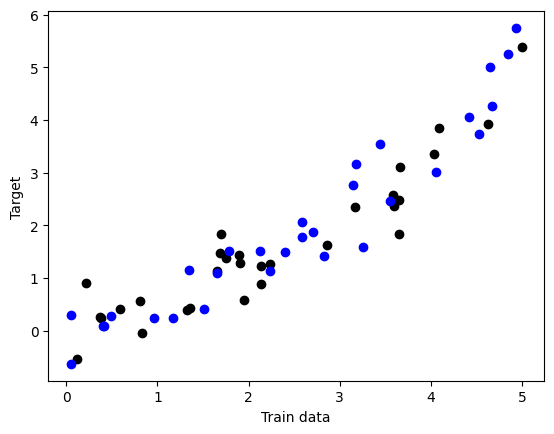

In [150]:
## PART (a): 
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [238]:
from codes.Regression import Regression

In [239]:
## PART (c): 
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value [4.28238063]
Gradient value [[ -3.19217252]
 [-10.44504584]]


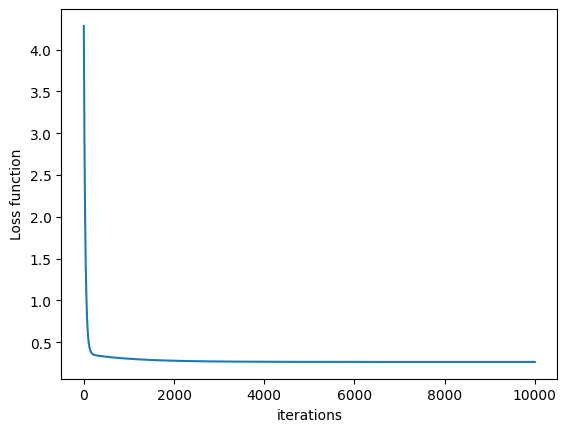

[[-0.37469204]
 [ 0.88377017]]
Final loss: [0.26418465]



In [240]:
## PART (d): 
## Complete train_LR function in Regression.py file 
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print('Final loss:',loss_history[-1])
print()

for learning rate:  0.1
[[-0.37906992]
 [ 0.8852483 ]]
Final loss: [0.26417938]
for learning rate:  0.01
[[-0.37906992]
 [ 0.8852483 ]]
Final loss: [0.26417938]
for learning rate:  0.001
[[-0.37469204]
 [ 0.88377017]]
Final loss: [0.26418465]
for learning rate:  0.0001
[[-0.00748097]
 [ 0.75978588]]
Final loss: [0.30212535]


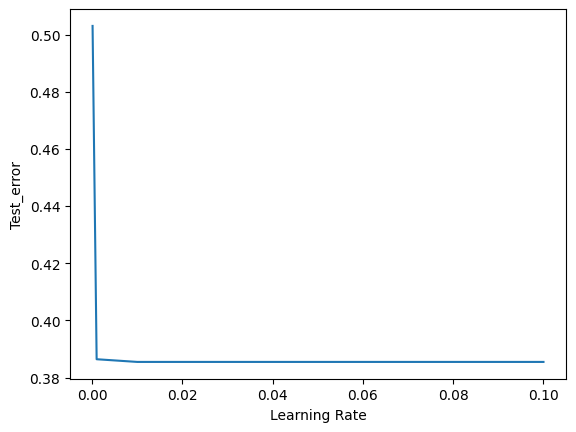

In [241]:
## PART (d) (Different Learning Rates):
from numpy.linalg import norm
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
test_err = np.zeros((len(lrs),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different learning rates and average the test error over 10 times
# ================================================================ #
for index in range(len(lrs)):
    l = lrs[index]
    numTrainings = 10
    print("for learning rate: ", l)
    for i in range(numTrainings): # train each model 10 times
        regression = Regression(m=1, reg_param=0)
        loss_hist, w_here = regression.train_LR(X_train, y_train, eta = l, batch_size = 30, num_iters = 10000)
        y_prediction = regression.predict(X_test)
        avg_test_err = 0
        for ind in range(len(y_prediction)):
            avg_test_err += (y_test[ind] - y_prediction[ind])**2
        avg_test_err /= len(y_prediction)
        test_err[index] += avg_test_err
        if (i == numTrainings -1):
            print(w_here)
            print('Final loss:',loss_hist[-1])
    test_err[index] /= numTrainings
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(lrs,test_err)
plt.xlabel('Learning Rate')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

In [242]:
## PART (e): 
## Complete closed_form function in Regression.py file
optimal_loss, optimal_grad, optimal_w = regression.closed_form(X_train, y_train)
'''print('Optimal solution loss',loss_2)
print('Optimal solution gradient',w_2)'''
print('Optimal closed-form solution', optimal_w)
print('Optimal closed-form loss: ', optimal_loss)
print('Optimal closed-form gradient: ', optimal_grad)

Optimal closed-form solution [-0.37906992  0.8852483 ]
Optimal closed-form loss:  0.26417938203964436
Optimal closed-form gradient:  [-1.85037171e-15 -3.84137167e-15]


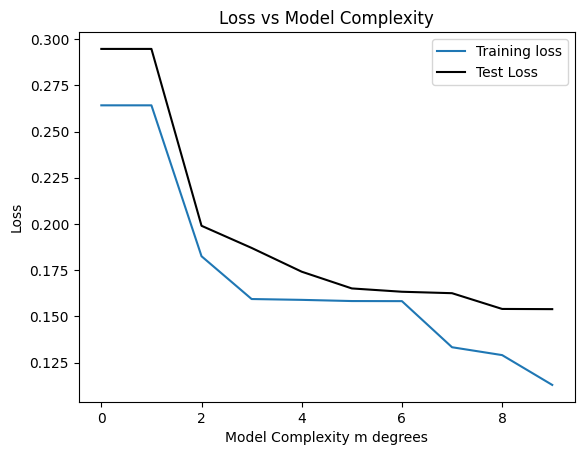

In [243]:
## PART (g): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
rangeM = np.arange(0, 10)
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
m = 0
while (m < 10): # for m is 0 to 10
    regression = Regression(m, reg_param=0)
    closed_form_loss, closed_form_grad, closed_form_w = regression.closed_form(X_train, y_train)
    train_loss[m] = closed_form_loss
    regression = Regression(m, reg_param=0)
    closed_form_loss, closed_form_grad, closed_form_w = regression.closed_form(X_test, y_test)
    test_loss[m] = closed_form_loss
    m += 1
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.plot(train_loss, label = "Training loss")
plt.plot(test_loss, color='black', label = "Test Loss")
plt.title("Loss vs Model Complexity")
plt.xlabel("Model Complexity m degrees")
plt.ylabel("Loss")
plt.legend()
plt.show()

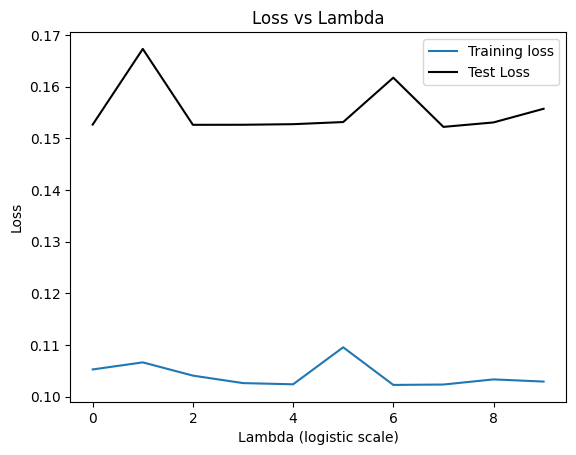

In [244]:
#PART (i): 
train_loss_unregularized=np.zeros((10,1))
test_loss_unregularized=np.zeros((10,1))
train_loss_regularized=np.zeros((10,1))
test_loss_regularized=np.zeros((10,1))
x = np.arange(0, 10)
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for lamda range from 1 to 10
# ================================================================ #
lam = [0, 10e-8, 10e-7, 10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0]
m = 10
for i in range(len(lam)):
    # unregularized losses calculated
    regression = Regression(m, reg_param=lam[i])
    closed_form_loss_unreg, closed_form_grad_unreg, closed_form_w = regression.closed_form(X_train, y_train, True, False)
    train_loss_unregularized[i] = closed_form_loss_unreg
    regression = Regression(m, reg_param=lam[i])
    closed_form_loss_unreg, closed_form_grad_unreg, closed_form_w = regression.closed_form(X_test, y_test, True, False)
    test_loss_unregularized[i] = closed_form_loss_unreg

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.plot(train_loss_unregularized, label = "Training loss")
plt.plot(test_loss_unregularized, color='black', label = "Test Loss")
plt.title("Loss vs Lambda")
plt.xlabel("Lambda (logistic scale)")
plt.ylabel("Loss")
plt.legend()
plt.show()